In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import os
from acquire import *
from prepare import *

pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")

import re

In [22]:
df = pd.read_csv('timestamped_df_updated.csv')

In [23]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [24]:
col_list = df.columns.to_list()

In [25]:
for column in col_list:
    print(f'{column}')
    print('------------------')

BlueTeamAirDragon
------------------
BlueTopAssists
------------------
RedSupportAssists
------------------
BlueJungleAssists
------------------
BlueMidAssists
------------------
BlueADCAssists
------------------
BlueSupportAssists
------------------
RedTopAssists
------------------
RedJungleAssists
------------------
RedMidAssists
------------------
RedADCAssists
------------------
BlueTeamBarons
------------------
BlueTeamChemtechDragon
------------------
BlueTopCurrentGold
------------------
RedSupportCurrentGold
------------------
BlueJungleCurrentGold
------------------
BlueMidCurrentGold
------------------
BlueADCCurrentGold
------------------
BlueSupportCurrentGold
------------------
RedTopCurrentGold
------------------
RedJungleCurrentGold
------------------
RedMidCurrentGold
------------------
RedADCCurrentGold
------------------
BlueTopDeaths
------------------
RedSupportDeaths
------------------
BlueJungleDeaths
------------------
BlueMidDeaths
------------------
BlueADCDeat

In [27]:
df['timestamp'] = round(df.timestamp / 60000)

In [28]:
df.timestamp

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
9301    23.0
9302    23.0
9303    23.0
9304    23.0
9305    23.0
Name: timestamp, Length: 9306, dtype: float64

In [108]:
df['BlueTeamKda'] = (df.BlueTopKda + df.BlueJungleKda + df.BlueMidKda + df.BlueBotKda + df.BlueSupportKda)/5

In [109]:
df['RedTeamKda'] = (df.RedTopKda + df.RedJungleKda + df.RedMidKda + df.RedBotKda + df.RedSupportKda)/5

In [29]:
df_20 = df[df.timestamp == 20]

Text(0.5, 1.0, 'Features Correlation With gameDuration')

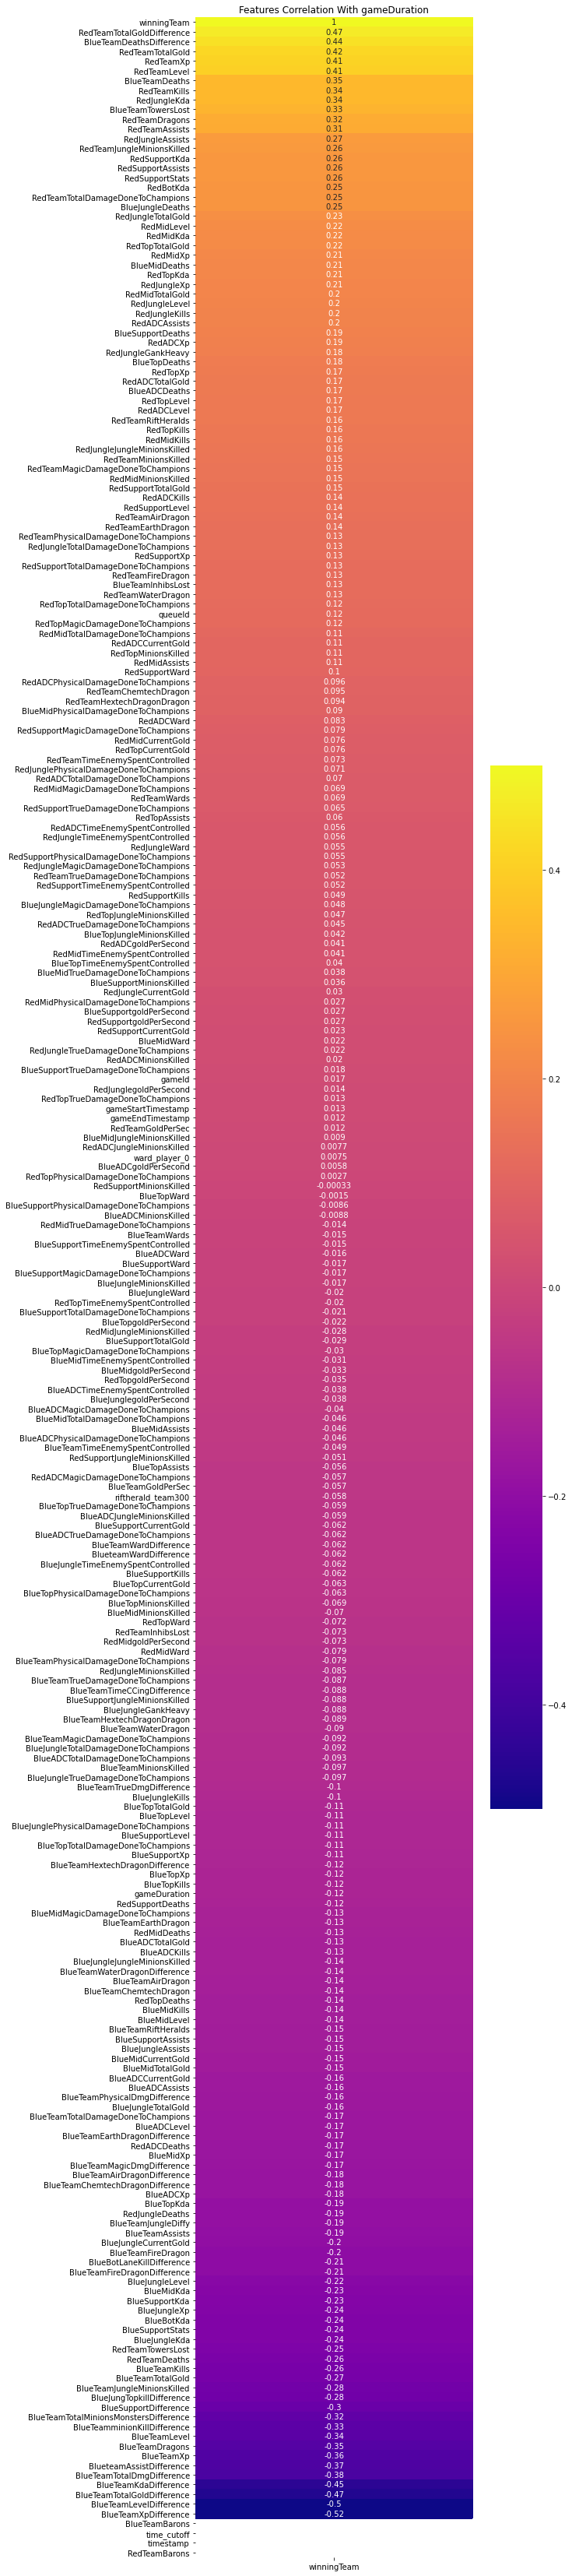

In [33]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(df_20.corr()[['winningTeam']].sort_values(by = 'winningTeam',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

In [34]:
df_20.winningTeam.value_counts()

200.0    217
100.0    206
Name: winningTeam, dtype: int64

In [38]:
df_blue = df_20[df_20.winningTeam == 100]

In [39]:
df_red = df_20[df_20.winningTeam == 200]

In [44]:
df_red = df_red[:207]

In [45]:
df_blue.BlueTeamDragons.sum()

315.0

In [46]:
df_red.RedTeamDragons.sum()

318.0

In [48]:
df_blue.BlueTeamRiftHeralds.sum()

179.0

In [50]:
df_blue.BlueTeamRiftHeralds.mean()

0.8689320388349514

In [51]:
df_red.RedTeamRiftHeralds.sum()

157.0

In [53]:
df_red.RedTeamRiftHeralds.mean()

0.7584541062801933

In [56]:
df.BlueTeamRiftHeralds.value_counts()

0.0    6658
1.0    2233
2.0     415
Name: BlueTeamRiftHeralds, dtype: int64

In [54]:
df.RedTeamRiftHeralds.value_counts()

0.0    7026
1.0    1959
2.0     321
Name: RedTeamRiftHeralds, dtype: int64

In [61]:
df_rift_red_2 = df[df.RedTeamRiftHeralds == 2]

In [62]:
df_rift_blue_2 = df[df.BlueTeamRiftHeralds == 2]

In [65]:
df_rift_red_2.winningTeam.value_counts()

200.0    229
100.0     92
Name: winningTeam, dtype: int64

In [67]:
df_rift_blue_2.winningTeam.value_counts()

100.0    272
200.0    143
Name: winningTeam, dtype: int64

In [69]:
df.RedTeamDragons.value_counts()

0.0    5193
1.0    2709
2.0    1139
3.0     261
4.0       4
Name: RedTeamDragons, dtype: int64

In [70]:
df.BlueTeamDragons.value_counts()

0.0    5372
1.0    2645
2.0    1059
3.0     226
4.0       4
Name: BlueTeamDragons, dtype: int64

In [71]:
df_dragons_red_2 = df[df.RedTeamDragons >= 2]

In [72]:
df_dragons_blue_2 = df[df.BlueTeamDragons >= 2]

In [73]:
df_dragons_red_2.winningTeam.value_counts()

200.0    919
100.0    485
Name: winningTeam, dtype: int64

In [74]:
df_dragons_blue_2.winningTeam.value_counts()

100.0    860
200.0    429
Name: winningTeam, dtype: int64

In [77]:
df.RedJungleKda.value_counts()

 0.00     1248
 1.25      401
 0.75      341
 0.25      297
 2.00      274
          ... 
-7.25        1
 18.25       1
 18.50       1
 20.75       1
 21.50       1
Name: RedJungleKda, Length: 122, dtype: int64

In [126]:
df_blue_higher_kda = df[df.BlueTeamKda < df.RedTeamKda]

In [127]:
df_red_top = df_blue_higher_kda[df_blue_higher_kda.RedTopKda > df_blue_higher_kda.BlueTopKda]
df_red_top.winningTeam.value_counts(normalize = True)

200.0    0.665426
100.0    0.334574
Name: winningTeam, dtype: float64

In [128]:
df_red_jung = df_blue_higher_kda[df_blue_higher_kda.RedJungleKda > df_blue_higher_kda.BlueJungleKda]
df_red_jung.winningTeam.value_counts(normalize = True)

200.0    0.661801
100.0    0.338199
Name: winningTeam, dtype: float64

In [129]:
df_red_mid = df_blue_higher_kda[df_blue_higher_kda.RedMidKda > df_blue_higher_kda.BlueMidKda]
df_red_mid.winningTeam.value_counts(normalize = True)

200.0    0.648313
100.0    0.351687
Name: winningTeam, dtype: float64

In [130]:
df_red_adc = df_blue_higher_kda[df_blue_higher_kda.RedBotKda > df_blue_higher_kda.BlueBotKda]
df_red_adc.winningTeam.value_counts(normalize = True)

200.0    0.647797
100.0    0.352203
Name: winningTeam, dtype: float64

In [131]:
df_red_supp = df_blue_higher_kda[df_blue_higher_kda.RedSupportKda > df_blue_higher_kda.BlueSupportKda]
df_red_supp.winningTeam.value_counts(normalize = True)

200.0    0.63254
100.0    0.36746
Name: winningTeam, dtype: float64

In [105]:
df_red_top = df[df.RedTopKda > df.BlueTopKda]
df_red_top.winningTeam.value_counts(normalize = True)

200.0    0.569586
100.0    0.430414
Name: winningTeam, dtype: float64

In [104]:
df_red_jungle = df[df.RedJungleKda > df.BlueJungleKda]
df_red_jungle.winningTeam.value_counts(normalize = True)

200.0    0.606596
100.0    0.393404
Name: winningTeam, dtype: float64

In [103]:
df_red_mid = df[df.RedMidKda > df.BlueMidKda]
df_red_mid.winningTeam.value_counts(normalize = True)

200.0    0.575239
100.0    0.424761
Name: winningTeam, dtype: float64

In [102]:
df_red_adc = df[df.RedBotKda > df.BlueBotKda]
df_red_adc.winningTeam.value_counts(normalize = True)

200.0    0.589396
100.0    0.410604
Name: winningTeam, dtype: float64

In [100]:
df_red_supp = df[df.RedSupportKda > df.BlueSupportKda]
df_red_supp.winningTeam.value_counts(normalize = True)

200.0    0.580433
100.0    0.419567
Name: winningTeam, dtype: float64